In [1]:
import numpy as np
import pandas as pd

In [2]:
import MySQLdb

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.simplefilter("ignore")

### Input Data

In [5]:
with open("D:/github_projects/login.txt") as file:
    myserver_config = file.read().split(",") #config data for SQL server
    connect = MySQLdb.connect(*myserver_config)
    cursor = connect.cursor()
    query = "SELECT * FROM titanium_pure"
    data = pd.read_sql(query, connect, index_col="id")

In [6]:
def change_types(mydata):
    mydata = mydata.replace("None", np.nan)
    for elem in ["Density", "Х", "У", "Scanning_spot"]:
        mydata[elem] = mydata[elem].str.replace(",", ".")
        mydata[elem] = mydata[elem].astype(np.float32)
    return mydata


In [7]:
data = change_types(data)

### Data Preprocessing

Main data description

In [12]:
data.head()

,Lazer,Power,Speed,Scanning_speed,Thickness,Stratagy,Density,Х,У,Scanning_spot
id,,,,,,,,,,
1,1,160,700,80,50,Lines,95.709999,85.0,15.0,227.0
2,1,180,700,80,50,Lines,96.669998,60.0,15.0,227.0
3,1,200,700,80,50,Lines,97.000000,35.0,15.0,227.0
4,1,160,750,80,50,Lines,95.970001,10.0,15.0,227.0
5,1,180,750,80,50,Lines,96.480003,-15.0,15.0,227.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 1 to 492
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lazer           492 non-null    int64  
 1   Power           492 non-null    int64  
 2   Speed           492 non-null    int64  
 3   Scanning_speed  492 non-null    int64  
 4   Thickness       492 non-null    int64  
 5   Stratagy        492 non-null    object 
 6   Density         492 non-null    float32
 7   Х               472 non-null    float32
 8   У               472 non-null    float32
 9   Scanning_spot   492 non-null    float32
dtypes: float32(4), int64(5), object(1)
memory usage: 34.6+ KB


In [16]:
data.describe()

,Lazer,Power,Speed,Scanning_speed,Thickness,Density,Х,У,Scanning_spot
count,492.000000,492.000000,492.000000,492.000000,492.0,492.000000,472.000000,472.000000,492.000000
mean,1.272358,250.538618,749.065041,108.274390,50.0,96.484818,-0.021186,-9.237288,201.008133
std,0.445626,75.446833,157.397171,11.378505,0.0,1.360940,58.932468,58.351921,40.959236
min,1.000000,30.000000,200.000000,70.000000,50.0,86.550003,-95.000000,-100.000000,76.500000
25%,1.000000,195.000000,700.000000,100.000000,50.0,96.110001,-45.000000,-60.000000,201.000000
50%,1.000000,260.000000,740.000000,110.000000,50.0,96.550003,-5.000000,-20.000000,208.000000
75%,2.000000,300.000000,800.000000,120.000000,50.0,97.029999,55.000000,40.000000,227.000000
max,2.000000,395.000000,1400.000000,120.000000,50.0,109.419998,100.000000,105.000000,227.000000


Distribution of numerical data

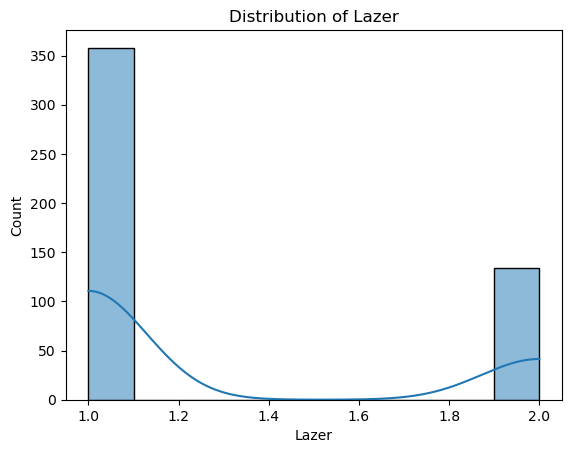

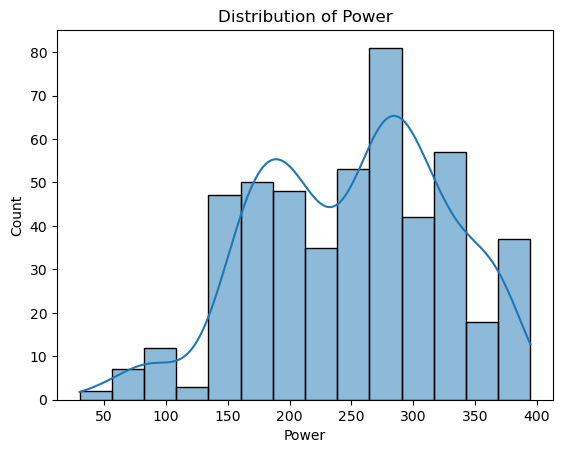

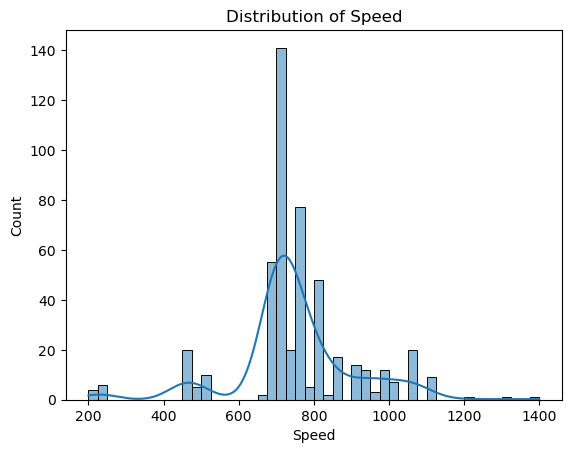

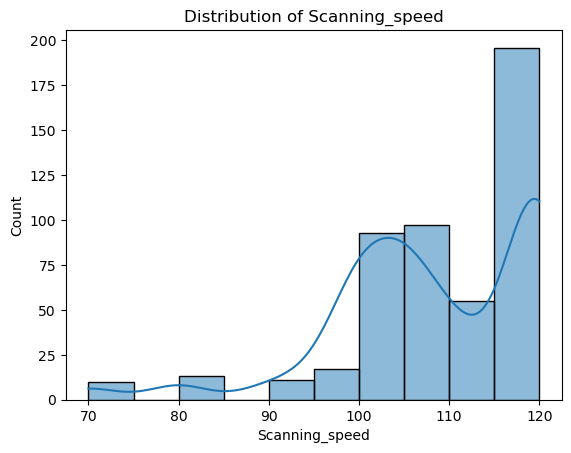

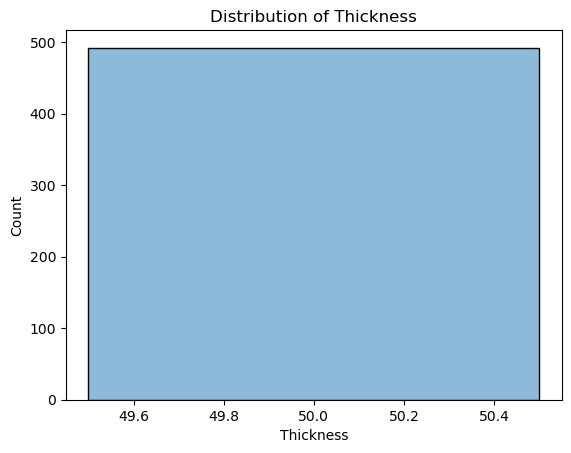

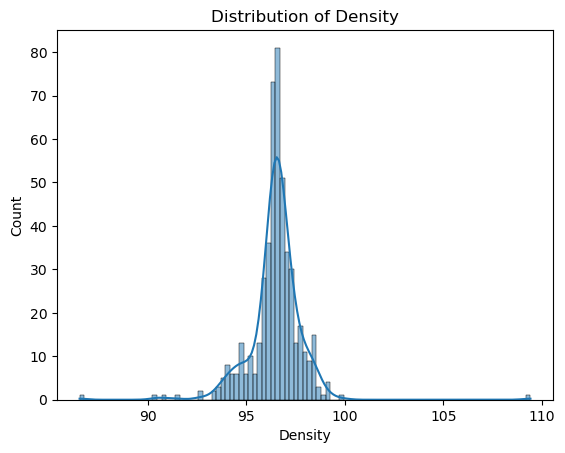

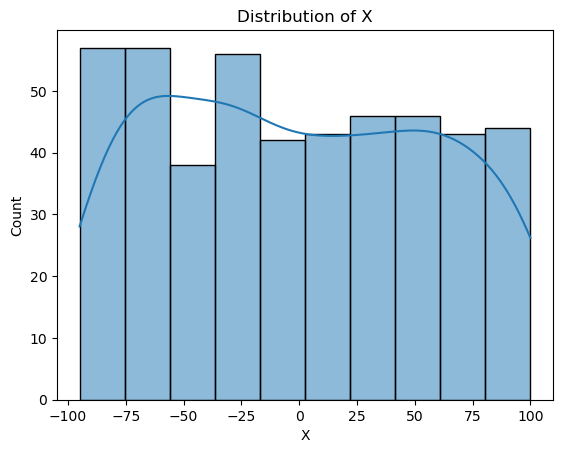

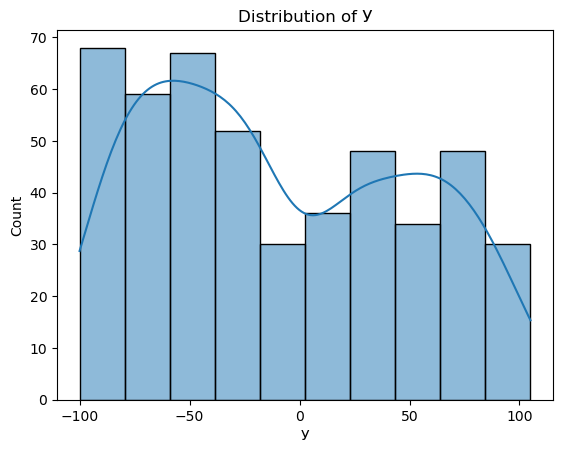

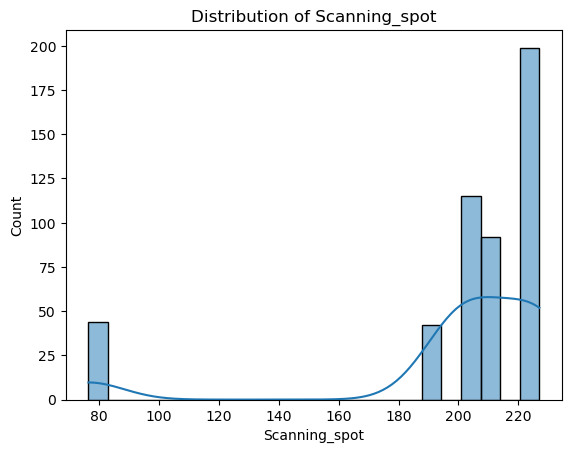

In [22]:
numerical_columns = data.select_dtypes(["int", "float"]).columns
for col in numerical_columns:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show();

In [18]:
numerical_columns

,Lazer,Power,Speed,Scanning_speed,Thickness,Density,Х,У,Scanning_spot
id,,,,,,,,,
1,1,160,700,80,50,95.709999,85.0,15.0,227.0
2,1,180,700,80,50,96.669998,60.0,15.0,227.0
3,1,200,700,80,50,97.000000,35.0,15.0,227.0
4,1,160,750,80,50,95.970001,10.0,15.0,227.0
5,1,180,750,80,50,96.480003,-15.0,15.0,227.0
...,...,...,...,...,...,...,...,...,...
488,1,370,1100,120,50,96.730003,75.0,-60.0,76.5
489,1,385,1100,120,50,96.449997,75.0,-80.0,76.5
490,1,395,1100,120,50,97.809998,100.0,-90.0,76.5


Emmisions in Data

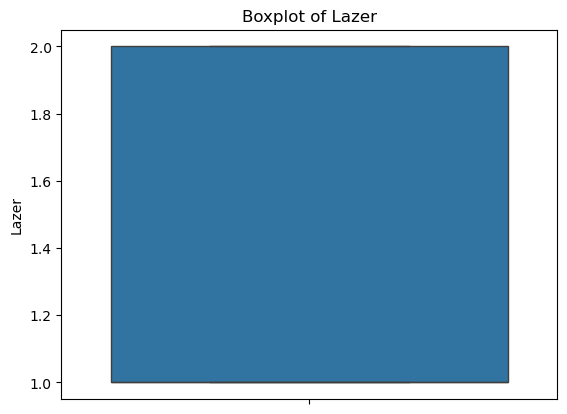

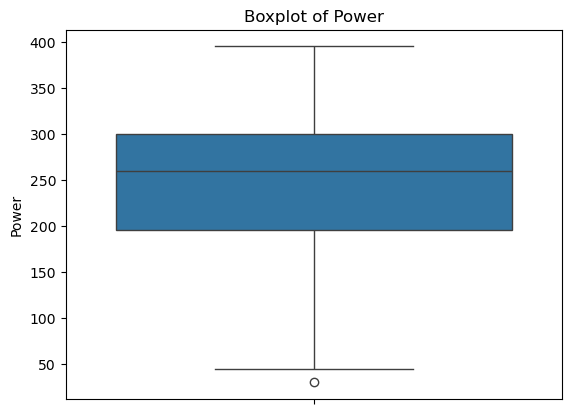

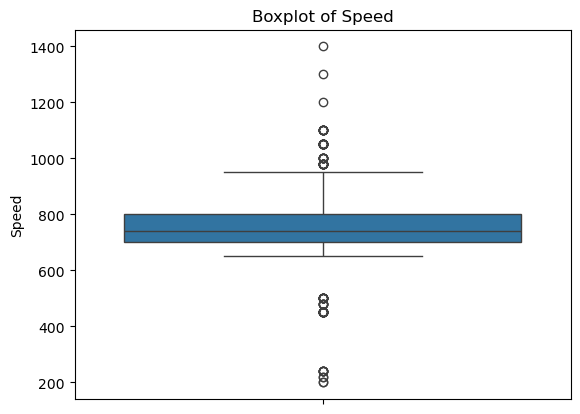

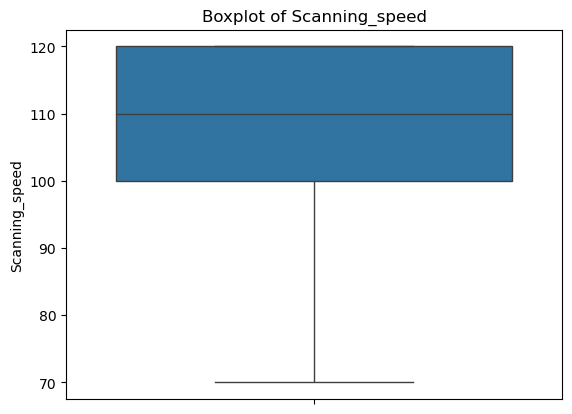

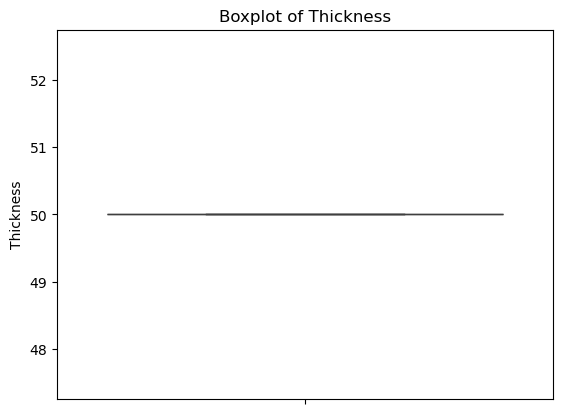

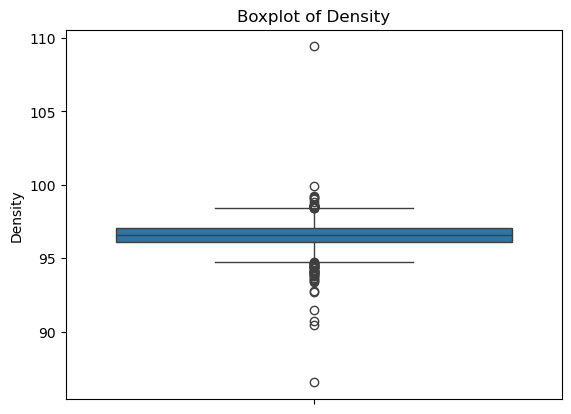

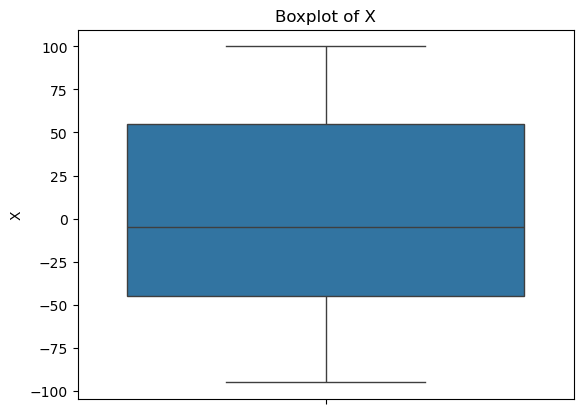

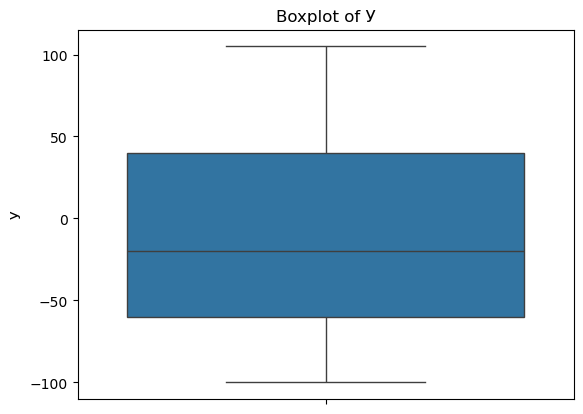

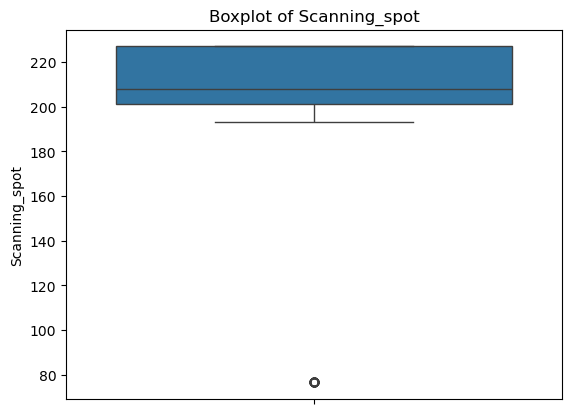

In [23]:
for col in numerical_columns:
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.show();